In [1]:
import os
import torch
import numpy as np
import setup.dataset as dataset
import setup.ResUNet as ResUNet
import setup.UNet as UNet
import setup.CNN as CNN
import setup.HSCNN as HSCNN
import setup.DeepLabV3 as DeepLabV3
import setup.SegNet as SegNet
import setup.classifier as classifier
from torch.utils.data import SubsetRandomSampler
from PIL import Image
import matplotlib.pyplot as plt

np.random.seed(0)
torch.manual_seed(0)

DATASET_PATH = 'dataset/predict'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

weed_dataset = dataset.WeedDataset(DATASET_PATH, random_rotate=False)

test_indices = list(range(len(weed_dataset)))

model = ResUNet.ResUNet().to(device)
path = 'outputs/augmentation_dataset/512/ResUNet.pt'

classifier = classifier.WeedClassifier(model, device)
if str(device) == 'cpu':
    classifier.model.load_state_dict(torch.load(path, map_location='cpu'))
else:
    classifier.model.load_state_dict(torch.load(path))

cpu


In [2]:
i=3

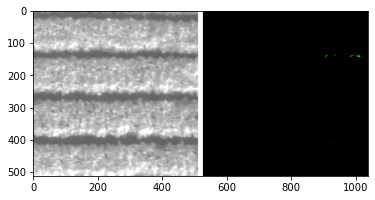

In [3]:
image_index = test_indices[i]
sample = weed_dataset[image_index]
output = classifier.predict(sample)

# print('{}.png  Score: {}'.format(image_index, score))
nir = sample['nir']
# nir.show()
# nir = nir.numpy().transpose(1, 2, 0)
# print(nir.size)
output = Image.fromarray((output * 255).astype(np.uint8))

# rgb = rgb.numpy().transpose(1, 2, 0)

# Image.fromarray(np.hstack((np.array(mask),np.array(output)))).show()

# mask.show()
# output.show()

line = (np.ones((weed_dataset.size,15,3))*255).astype(np.uint8)

plt.imshow(Image.fromarray(np.hstack((np.array(nir), line, np.array(output)))))

i += 1
if i >= len(test_indices):
    i = 0